# Прогнозирование мощности кондиционера в зависимости от температуры, влажности и количества людей

Устанавливаем scikit-fuzzy

In [12]:
!pip install scikit-fuzzy

Испортируем библиотеки

In [7]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Моделирование мощности в зависимости от температуры, влажности и количества людей

В данном коде создаются функции принадлежности для трех параметров: температуры, влажности и количества людей. Используется нечеткая логика для вычисления мощности, которая зависит от комбинации этих параметров. Применяется несколько правил для определения мощности на основе значений этих параметров.

Затем создаются трехмерные графики, на которых отображаются взаимосвязи между температурой, влажностью, количеством людей и мощностью. Моделирование выполнено с использованием библиотеки `matplotlib` для визуализации данных.


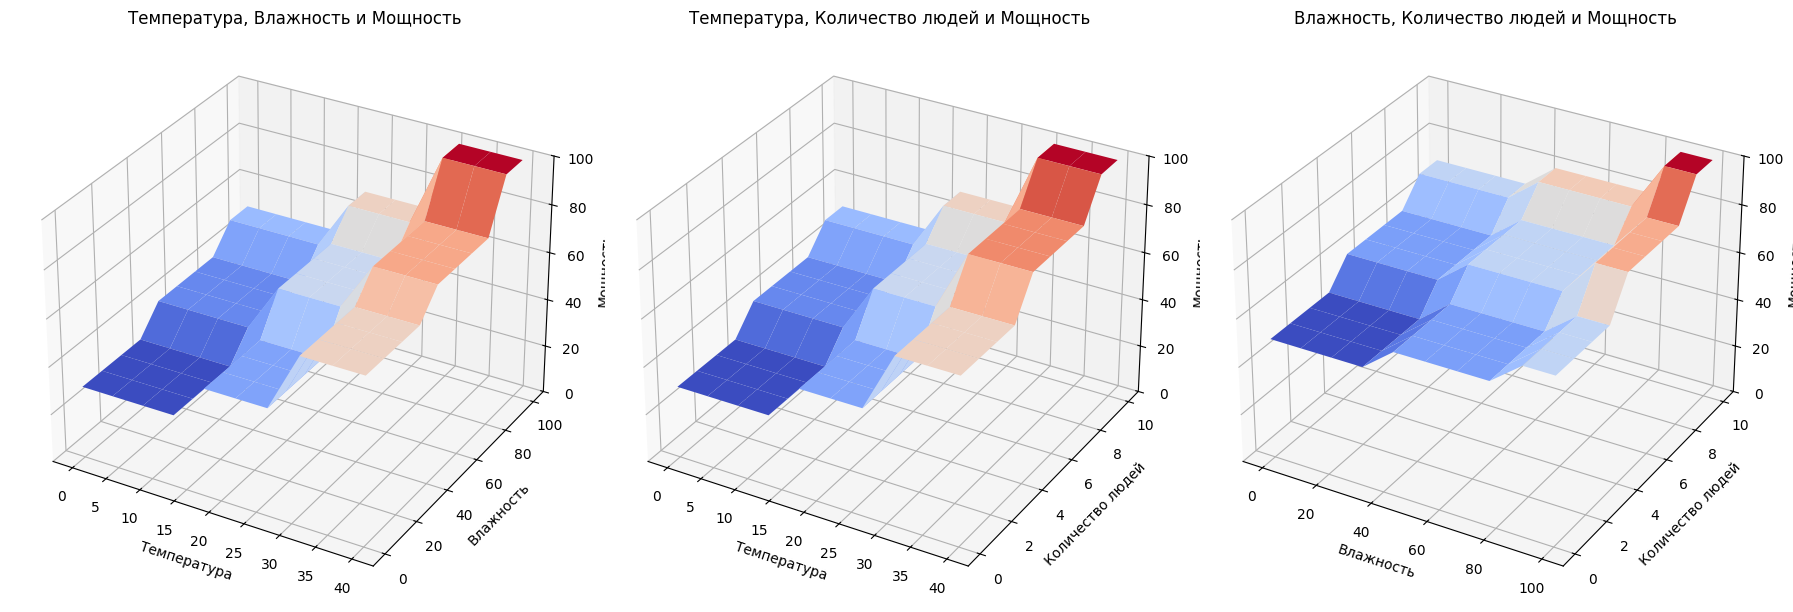

In [8]:
# Универсумы для каждого параметра
x_temp = np.linspace(0, 40, 100)
x_humidity = np.linspace(0, 100, 100)
x_people = np.linspace(0, 10, 100)
x_power = np.linspace(0, 100, 100)

# Функции принадлежности для температуры
cold = fuzz.trapmf(x_temp, [0, 0, 5, 15])
comfortable = fuzz.trapmf(x_temp, [5, 15, 25, 30])
hot = fuzz.trapmf(x_temp, [25, 30, 40, 40])

# Функции принадлежности для влажности
dry = fuzz.trapmf(x_humidity, [0, 0, 20, 40])
normal = fuzz.trapmf(x_humidity, [20, 40, 60, 80])
humid = fuzz.trapmf(x_humidity, [60, 80, 100, 100])

# Функции принадлежности для количества людей
few = fuzz.trapmf(x_people, [0, 0, 2, 4])
moderate = fuzz.trapmf(x_people, [2, 4, 6, 8])
crowded = fuzz.trapmf(x_people, [6, 8, 10, 10])

# Функция для применения 27 правил
def apply_rules(temp_level, humidity_level, people_level):
    if temp_level == 'cold' and humidity_level == 'dry' and people_level == 'few':
        return 10
    elif temp_level == 'cold' and humidity_level == 'dry' and people_level == 'moderate':
        return 20
    elif temp_level == 'cold' and humidity_level == 'dry' and people_level == 'crowded':
        return 30
    elif temp_level == 'cold' and humidity_level == 'normal' and people_level == 'few':
        return 20
    elif temp_level == 'cold' and humidity_level == 'normal' and people_level == 'moderate':
        return 30
    elif temp_level == 'cold' and humidity_level == 'normal' and people_level == 'crowded':
        return 40
    elif temp_level == 'cold' and humidity_level == 'humid' and people_level == 'few':
        return 30
    elif temp_level == 'cold' and humidity_level == 'humid' and people_level == 'moderate':
        return 40
    elif temp_level == 'cold' and humidity_level == 'humid' and people_level == 'crowded':
        return 50
    elif temp_level == 'comfortable' and humidity_level == 'dry' and people_level == 'few':
        return 25
    elif temp_level == 'comfortable' and humidity_level == 'dry' and people_level == 'moderate':
        return 35
    elif temp_level == 'comfortable' and humidity_level == 'dry' and people_level == 'crowded':
        return 45
    elif temp_level == 'comfortable' and humidity_level == 'normal' and people_level == 'few':
        return 35
    elif temp_level == 'comfortable' and humidity_level == 'normal' and people_level == 'moderate':
        return 50
    elif temp_level == 'comfortable' and humidity_level == 'normal' and people_level == 'crowded':
        return 60
    elif temp_level == 'comfortable' and humidity_level == 'humid' and people_level == 'few':
        return 45
    elif temp_level == 'comfortable' and humidity_level == 'humid' and people_level == 'moderate':
        return 60
    elif temp_level == 'comfortable' and humidity_level == 'humid' and people_level == 'crowded':
        return 70
    elif temp_level == 'hot' and humidity_level == 'dry' and people_level == 'few':
        return 50
    elif temp_level == 'hot' and humidity_level == 'dry' and people_level == 'moderate':
        return 60
    elif temp_level == 'hot' and humidity_level == 'dry' and people_level == 'crowded':
        return 70
    elif temp_level == 'hot' and humidity_level == 'normal' and people_level == 'few':
        return 60
    elif temp_level == 'hot' and humidity_level == 'normal' and people_level == 'moderate':
        return 70
    elif temp_level == 'hot' and humidity_level == 'normal' and people_level == 'crowded':
        return 80
    elif temp_level == 'hot' and humidity_level == 'humid' and people_level == 'few':
        return 70
    elif temp_level == 'hot' and humidity_level == 'humid' and people_level == 'moderate':
        return 85
    elif temp_level == 'hot' and humidity_level == 'humid' and people_level == 'crowded':
        return 100
    return 0

# Подготовка данных для трехмерных графиков
temp_range = np.linspace(0, 40, 10)
humidity_range = np.linspace(0, 100, 10)
people_range = np.linspace(0, 10, 10)

power_values_temp_humidity = np.zeros((10, 10))
power_values_temp_people = np.zeros((10, 10))
power_values_people_humidity = np.zeros((10, 10))

# Заполнение данных по правилам
for i, temp in enumerate(temp_range):
    for j, humidity in enumerate(humidity_range):
        for k, people in enumerate(people_range):
            temp_level = 'cold' if temp < 15 else 'comfortable' if temp < 30 else 'hot'
            humidity_level = 'dry' if humidity < 40 else 'normal' if humidity < 80 else 'humid'
            people_level = 'few' if people < 4 else 'moderate' if people < 8 else 'crowded'
            power = apply_rules(temp_level, humidity_level, people_level)
            power_values_temp_humidity[i, j] = power
            power_values_temp_people[i, k] = power
            power_values_people_humidity[j, k] = power

fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(131, projection='3d')
X, Y = np.meshgrid(temp_range, humidity_range)
ax1.plot_surface(X, Y, power_values_temp_humidity.T, cmap='coolwarm')
ax1.set_xlabel('Температура')
ax1.set_ylabel('Влажность')
ax1.set_zlabel('Мощность')
ax1.set_title('Температура, Влажность и Мощность')

ax2 = fig.add_subplot(132, projection='3d')
X, Y = np.meshgrid(temp_range, people_range)
ax2.plot_surface(X, Y, power_values_temp_people.T, cmap='coolwarm')
ax2.set_xlabel('Температура')
ax2.set_ylabel('Количество людей')
ax2.set_zlabel('Мощность')
ax2.set_title('Температура, Количество людей и Мощность')

ax3 = fig.add_subplot(133, projection='3d')
X, Y = np.meshgrid(humidity_range, people_range)
ax3.plot_surface(X, Y, power_values_people_humidity.T, cmap='coolwarm')
ax3.set_xlabel('Влажность')
ax3.set_ylabel('Количество людей')
ax3.set_zlabel('Мощность')
ax3.set_title('Влажность, Количество людей и Мощность')

ax1.set_zlim(0, 100)
ax2.set_zlim(0, 100)
ax3.set_zlim(0, 100)

plt.tight_layout()
plt.show()


В данном коде используется нечеткая логика для вычисления мощности, которая зависит от трех параметров: температуры, влажности и количества людей. Для каждого из этих параметров создаются функции принадлежности, определяющие, как различные значения параметра могут быть интерпретированы в контексте нечеткой логики.

Затем создается матрица мощности, которая содержит значения мощности для всех возможных комбинаций температурных уровней, уровней влажности и количества людей. Используя эту матрицу, программа рассчитывает мощность для каждой точки в трехмерных пространствах, объединяя параметры температуры, влажности и людей.

Графики отображают зависимости мощности от различных комбинаций этих трех параметров.



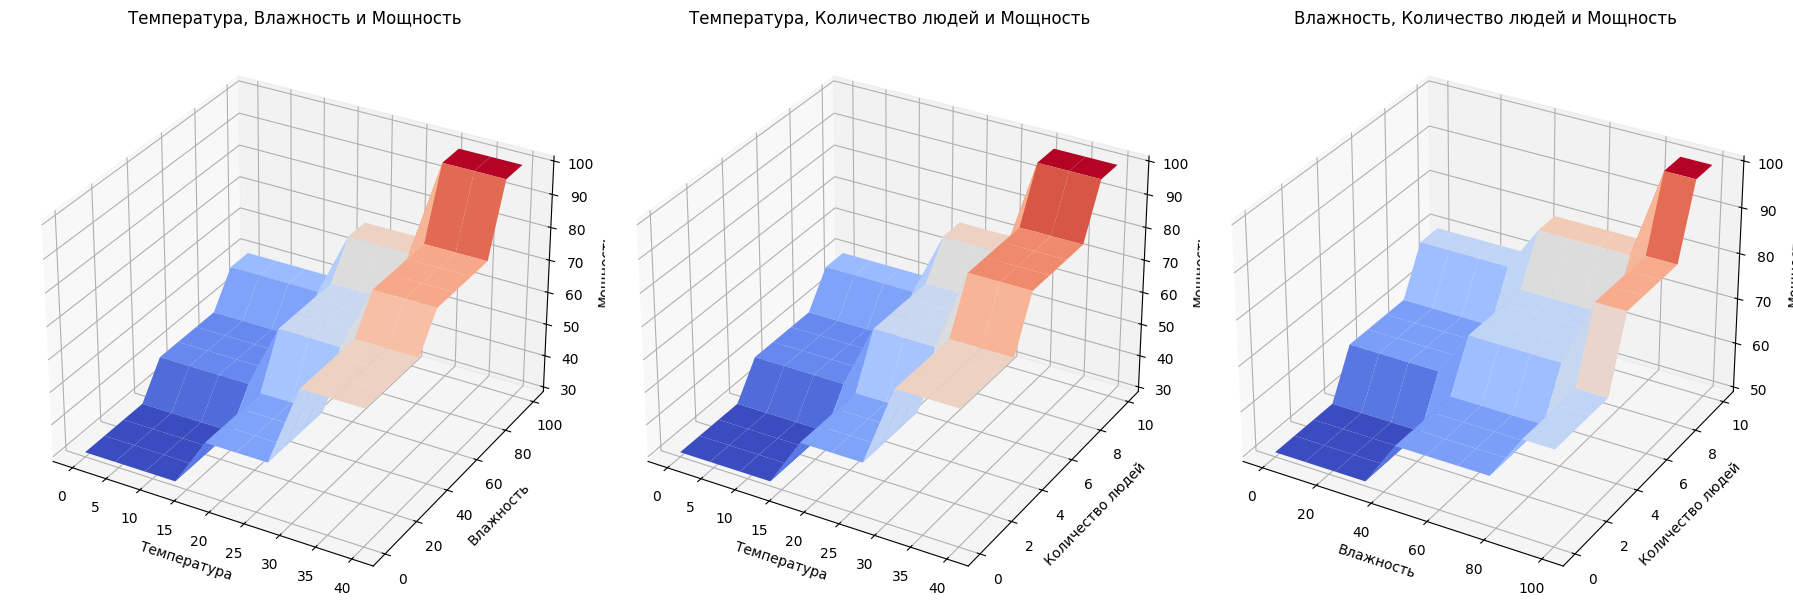

In [9]:
# Универсумы для каждого параметра
x_temp = np.linspace(0, 40, 100)
x_humidity = np.linspace(0, 100, 100)
x_people = np.linspace(0, 10, 100)

# Функции принадлежности для температуры
cold = fuzz.trapmf(x_temp, [0, 0, 5, 15])
comfortable = fuzz.trapmf(x_temp, [5, 15, 25, 30])
hot = fuzz.trapmf(x_temp, [25, 30, 40, 40])

# Функции принадлежности для влажности
dry = fuzz.trapmf(x_humidity, [0, 0, 20, 40])
normal = fuzz.trapmf(x_humidity, [20, 40, 60, 80])
humid = fuzz.trapmf(x_humidity, [60, 80, 100, 100])

# Функции принадлежности для количества людей
few = fuzz.trapmf(x_people, [0, 0, 2, 4])
moderate = fuzz.trapmf(x_people, [2, 4, 6, 8])
crowded = fuzz.trapmf(x_people, [6, 8, 10, 10])

# Матричная структура мощностей для всех возможных комбинаций параметров
power_matrix = np.array([
    [10, 20, 30], [20, 30, 40], [30, 40, 50],  # cold
    [25, 35, 45], [35, 50, 60], [45, 60, 70],  # comfortable
    [50, 60, 70], [60, 70, 80], [70, 85, 100]  # hot
])

# Функция для получения уровня мощности на основе индексов параметров
def get_power(temp_index, humidity_index, people_index):
    index = temp_index * 3 + humidity_index
    return power_matrix[index, people_index]

temp_range = np.linspace(0, 40, 10)
humidity_range = np.linspace(0, 100, 10)
people_range = np.linspace(0, 10, 10)

power_values_temp_humidity = np.zeros((10, 10))
power_values_temp_people = np.zeros((10, 10))
power_values_people_humidity = np.zeros((10, 10))

for i, temp in enumerate(temp_range):
    for j, humidity in enumerate(humidity_range):
        for k, people in enumerate(people_range):
            temp_level = 0 if temp < 15 else 1 if temp < 30 else 2
            humidity_level = 0 if humidity < 40 else 1 if humidity < 80 else 2
            people_level = 0 if people < 4 else 1 if people < 8 else 2
            power = get_power(temp_level, humidity_level, people_level)
            power_values_temp_humidity[i, j] = power
            power_values_temp_people[i, k] = power
            power_values_people_humidity[j, k] = power

fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(131, projection='3d')
X, Y = np.meshgrid(temp_range, humidity_range)
ax1.plot_surface(X, Y, power_values_temp_humidity.T, cmap='coolwarm')
ax1.set_xlabel('Температура')
ax1.set_ylabel('Влажность')
ax1.set_zlabel('Мощность')
ax1.set_title('Температура, Влажность и Мощность')

ax2 = fig.add_subplot(132, projection='3d')
X, Y = np.meshgrid(temp_range, people_range)
ax2.plot_surface(X, Y, power_values_temp_people.T, cmap='coolwarm')
ax2.set_xlabel('Температура')
ax2.set_ylabel('Количество людей')
ax2.set_zlabel('Мощность')
ax2.set_title('Температура, Количество людей и Мощность')

ax3 = fig.add_subplot(133, projection='3d')
X, Y = np.meshgrid(humidity_range, people_range)
ax3.plot_surface(X, Y, power_values_people_humidity.T, cmap='coolwarm')
ax3.set_xlabel('Влажность')
ax3.set_ylabel('Количество людей')
ax3.set_zlabel('Мощность')
ax3.set_title('Влажность, Количество людей и Мощность')

plt.tight_layout()
plt.show()


В этом коде мы рассчитываем мощность, используя несколько входных параметров: температура, влажность и количество людей. Для каждого из этих параметров задаются уровни, такие как "холодно", "комфортно" и "горячо" для температуры, а также уровни влажности и количества людей.

Применяется функция, которая определяет мощность в зависимости от комбинации этих уровней. Мы выводим все возможные комбинации значений температуры, влажности и количества людей, а также соответствующие им уровни мощности, которые определяются на основе заранее заданных правил.

In [10]:
# Значения температуры, влажности и количества людей
temp_values = np.arange(0, 45, 5)
humidity_values = np.arange(0, 120, 20)
people_values = np.arange(0, 12, 2)

# Функция для применения правил
def apply_rules(temp_level, humidity_level, people_level):
    if temp_level == 'cold' and humidity_level == 'dry' and people_level == 'few':
        return 10
    elif temp_level == 'cold' and humidity_level == 'dry' and people_level == 'moderate':
        return 20
    elif temp_level == 'cold' and humidity_level == 'dry' and people_level == 'crowded':
        return 30
    elif temp_level == 'cold' and humidity_level == 'normal' and people_level == 'few':
        return 20
    elif temp_level == 'cold' and humidity_level == 'normal' and people_level == 'moderate':
        return 30
    elif temp_level == 'cold' and humidity_level == 'normal' and people_level == 'crowded':
        return 40
    elif temp_level == 'cold' and humidity_level == 'humid' and people_level == 'few':
        return 30
    elif temp_level == 'cold' and humidity_level == 'humid' and people_level == 'moderate':
        return 40
    elif temp_level == 'cold' and humidity_level == 'humid' and people_level == 'crowded':
        return 50
    elif temp_level == 'comfortable' and humidity_level == 'dry' and people_level == 'few':
        return 25
    elif temp_level == 'comfortable' and humidity_level == 'dry' and people_level == 'moderate':
        return 35
    elif temp_level == 'comfortable' and humidity_level == 'dry' and people_level == 'crowded':
        return 45
    elif temp_level == 'comfortable' and humidity_level == 'normal' and people_level == 'few':
        return 35
    elif temp_level == 'comfortable' and humidity_level == 'normal' and people_level == 'moderate':
        return 50
    elif temp_level == 'comfortable' and humidity_level == 'normal' and people_level == 'crowded':
        return 60
    elif temp_level == 'comfortable' and humidity_level == 'humid' and people_level == 'few':
        return 45
    elif temp_level == 'comfortable' and humidity_level == 'humid' and people_level == 'moderate':
        return 60
    elif temp_level == 'comfortable' and humidity_level == 'humid' and people_level == 'crowded':
        return 70
    elif temp_level == 'hot' and humidity_level == 'dry' and people_level == 'few':
        return 50
    elif temp_level == 'hot' and humidity_level == 'dry' and people_level == 'moderate':
        return 60
    elif temp_level == 'hot' and humidity_level == 'dry' and people_level == 'crowded':
        return 70
    elif temp_level == 'hot' and humidity_level == 'normal' and people_level == 'few':
        return 60
    elif temp_level == 'hot' and humidity_level == 'normal' and people_level == 'moderate':
        return 70
    elif temp_level == 'hot' and humidity_level == 'normal' and people_level == 'crowded':
        return 80
    elif temp_level == 'hot' and humidity_level == 'humid' and people_level == 'few':
        return 70
    elif temp_level == 'hot' and humidity_level == 'humid' and people_level == 'moderate':
        return 85
    elif temp_level == 'hot' and humidity_level == 'humid' and people_level == 'crowded':
        return 100
    return 0

# Вывод всех комбинаций и соответствующих уровней мощности
for temp in temp_values:
    for humidity in humidity_values:
        for people in people_values:
            temp_level = 'cold' if temp < 15 else 'comfortable' if temp < 30 else 'hot'
            humidity_level = 'dry' if humidity < 40 else 'normal' if humidity < 80 else 'humid'
            people_level = 'few' if people < 4 else 'moderate' if people < 8 else 'crowded'

            power = apply_rules(temp_level, humidity_level, people_level)

            print(f"Температура: {temp}, Влажность: {humidity}, Количество людей: {people} => Мощность: {power}")


Температура: 0, Влажность: 0, Количество людей: 0 => Мощность: 10
Температура: 0, Влажность: 0, Количество людей: 2 => Мощность: 10
Температура: 0, Влажность: 0, Количество людей: 4 => Мощность: 20
Температура: 0, Влажность: 0, Количество людей: 6 => Мощность: 20
Температура: 0, Влажность: 0, Количество людей: 8 => Мощность: 30
Температура: 0, Влажность: 0, Количество людей: 10 => Мощность: 30
Температура: 0, Влажность: 20, Количество людей: 0 => Мощность: 10
Температура: 0, Влажность: 20, Количество людей: 2 => Мощность: 10
Температура: 0, Влажность: 20, Количество людей: 4 => Мощность: 20
Температура: 0, Влажность: 20, Количество людей: 6 => Мощность: 20
Температура: 0, Влажность: 20, Количество людей: 8 => Мощность: 30
Температура: 0, Влажность: 20, Количество людей: 10 => Мощность: 30
Температура: 0, Влажность: 40, Количество людей: 0 => Мощность: 20
Температура: 0, Влажность: 40, Количество людей: 2 => Мощность: 20
Температура: 0, Влажность: 40, Количество людей: 4 => Мощность: 30

Следующий код моделирует мощность, которая зависит от трех параметров: температуры, влажности и количества людей. Для каждого из этих параметров создаются функции принадлежности, которые позволяют определить, как различные значения могут быть интерпретированы в контексте нечеткой логики.

Затем используется оптимизированная версия функции применения правил, которая на основе значений температуры, влажности и количества людей возвращает соответствующий уровень мощности. Для каждой комбинации этих значений есть заранее определенная мощность, представляемая в виде словаря.

В примере, который показан ниже, определяется мощность кондиционера для комбинации температурного уровня, уровня влажности и уровня количества людей.

In [11]:
# Универсумы для каждого параметра
x_temp = np.linspace(0, 40, 100)
x_humidity = np.linspace(0, 100, 100)
x_people = np.linspace(0, 10, 100)

# Функции принадлежности для температуры
cold = fuzz.trapmf(x_temp, [0, 0, 5, 15])
comfortable = fuzz.trapmf(x_temp, [5, 15, 25, 30])
hot = fuzz.trapmf(x_temp, [25, 30, 40, 40])

# Функции принадлежности для влажности
dry = fuzz.trapmf(x_humidity, [0, 0, 20, 40])
normal = fuzz.trapmf(x_humidity, [20, 40, 60, 80])
humid = fuzz.trapmf(x_humidity, [60, 80, 100, 100])

# Функции принадлежности для количества людей
few = fuzz.trapmf(x_people, [0, 0, 2, 4])
moderate = fuzz.trapmf(x_people, [2, 4, 6, 8])
crowded = fuzz.trapmf(x_people, [6, 8, 10, 10])

# Оптимизированная функция применения правил
def apply_rules(temp_level, humidity_level, people_level):
    power_map = {
        ('cold', 'dry', 'few'): 10,
        ('cold', 'dry', 'moderate'): 20,
        ('cold', 'dry', 'crowded'): 30,
        ('cold', 'normal', 'few'): 20,
        ('cold', 'normal', 'moderate'): 30,
        ('cold', 'normal', 'crowded'): 40,
        ('cold', 'humid', 'few'): 30,
        ('cold', 'humid', 'moderate'): 40,
        ('cold', 'humid', 'crowded'): 50,
        ('comfortable', 'dry', 'few'): 25,
        ('comfortable', 'dry', 'moderate'): 35,
        ('comfortable', 'dry', 'crowded'): 45,
        ('comfortable', 'normal', 'few'): 35,
        ('comfortable', 'normal', 'moderate'): 50,
        ('comfortable', 'normal', 'crowded'): 60,
        ('comfortable', 'humid', 'few'): 45,
        ('comfortable', 'humid', 'moderate'): 60,
        ('comfortable', 'humid', 'crowded'): 70,
        ('hot', 'dry', 'few'): 50,
        ('hot', 'dry', 'moderate'): 60,
        ('hot', 'dry', 'crowded'): 70,
        ('hot', 'normal', 'few'): 60,
        ('hot', 'normal', 'moderate'): 70,
        ('hot', 'normal', 'crowded'): 80,
        ('hot', 'humid', 'few'): 70,
        ('hot', 'humid', 'moderate'): 85,
        ('hot', 'humid', 'crowded'): 100
    }

    return power_map.get((temp_level, humidity_level, people_level), 0)

# Пример использования функции
temp_level = 'comfortable'
humidity_level = 'normal'
people_level = 'few'

power_output = apply_rules(temp_level, humidity_level, people_level)
print(f'Выходная мощность: {power_output}')


Выходная мощность: 35
